Preprocessing 

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data
df = pd.read_csv("tuwaiq_data.csv")

# Weighted combination: emphasize more informative fields
df['composite_text'] = (
    df['Goals'].fillna('') * 2 + ' ' +
    df['Description'].fillna('') * 2 + ' ' +
    df['Features'].fillna('') + ' ' +
    df['Title'].fillna('') + ' ' +
    df['Category'].fillna('') + ' ' +
    df['Scope'].fillna('') + ' ' +
    df['Requirements'].fillna('')
)

#text cleaner
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['cleaned_text'] = df['composite_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dania\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


BERT Embeddings 

In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-mpnet-base-v2')  

bootcamp_embeddings = model.encode(df['cleaned_text'].tolist(), show_progress_bar=True)

c:\Anaconda\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dania\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP downloa

In [5]:
print("Bootcamp Embeddings shape:", np.array(bootcamp_embeddings).shape)

Bootcamp Embeddings shape: (47, 768)


In [18]:
cv_text_1 = """
Name: Sara Almutairi
Email: sara.almutairi@example.com
Phone: +966-5XXXXXXX
Location: Riyadh, Saudi Arabia
LinkedIn: linkedin.com/in/saraalmutairi
GitHub: github.com/saraalmutairi

Professional Summary:
Data scientist with experience in building end-to-end machine learning models, performing statistical analysis, and deploying solutions into production.

Education:
Bachelor of Science in Artificial Intelligence – Princess Nourah University
Graduation: June 2023

Certifications:
- IBM Data Science Professional Certificate
- Google Cloud Data Engineer Associate

Technical Skills:
- Programming Languages: Python, R, SQL
- Libraries: pandas, scikit-learn, matplotlib, seaborn, TensorFlow, Keras
- Tools: Jupyter, Google Colab, Tableau, BigQuery
- Databases: MySQL, PostgreSQL
- Cloud: Google Cloud Platform, AWS S3
- ML Tasks: Regression, Classification, Clustering, Time-Series

Projects:
Customer Churn Prediction
- Built a machine learning pipeline to predict customer churn for a telecom company
- Achieved 87% accuracy using Random Forest and XGBoost

House Price Forecasting
- Developed a regression model using LSTM to predict housing prices based on time-series data
- Visualized predictions and model evaluation in an interactive dashboard

Experience:
Machine Learning Intern – STC AI Lab
Jun 2023 – Sep 2023
- Built and validated ML models for internal fraud detection use cases
- Cleaned and engineered features from large-scale telecom datasets
- Presented insights to the product and strategy team

Languages:
- Arabic: Native
- English: Professional Working Proficiency

Interests:
- AI for Social Good
- Deep Learning
- Women in Tech initiatives

References:
Available upon request
"""
# Encode CV 
cv_embedding1= model.encode([cv_text_1])
print("CV Embedding shape:", cv_embedding1.shape)

CV Embedding shape: (1, 768)


cosine similarity + Matching 

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between CV and all bootcamps
similarities1 = cosine_similarity(cv_embedding1.reshape(1, -1), bootcamp_embeddings)

#Flatten the result to a 1D array of scores
similarities1 = similarities1.flatten()

#Rank bootcamps by highest similarity score
top_indices1 = np.argsort(similarities1)[::-1]

testing / Show Top N Recommendations

In [20]:
top_n = 5  

print("\nTop Bootcamp Matches:")
for i in range(top_n):
    index = top_indices1[i]
    score = similarities1[index]
    title = df.iloc[index]['Title']
    print(f"{i+1}. {title} (Score: {score:.3f})")


Top Bootcamp Matches:
1. Data Science and Machine Learning Using Python (Score: 0.682)
2. Building and developing artificial intelligence models (Score: 0.674)
3. Deep Learning with Keras (Score: 0.639)
4. Data Science and Machine Learning (Score: 0.553)
5. Data Analysis and Visualization Using Excel (Score: 0.547)


In [21]:
cv_text_2 = """
Name: Hadeel Alotaibi  
Email: hadeel.alotaibi@email.com  
Phone: +966-5XXXXXXX  
Location: Riyadh, Saudi Arabia  
LinkedIn: linkedin.com/in/hadeelalotaibi  

Professional Summary:  
Enthusiastic and fast-learning Computer Science graduate passionate about emerging technologies, data, and automation. Seeking an opportunity to grow technical skills through hands-on experience in real-world projects.  

Education:  
Bachelor of Science in Computer Science – Princess Nourah University  
Graduation Date: January 2024  

Technical Skills:  
- Programming: Python, Java  
- Tools: Git, VS Code  
- Concepts: OOP, Databases, Web Development  
- Interests: Artificial Intelligence, IoT, and Automation  

Projects:  
- Final Year Project: Built a basic web dashboard using Flask and SQLite to monitor weather API data.  
- Team Project: Contributed to an academic simulation of smart parking using Arduino and sensors.  

Certifications:  
- Introduction to Python (Coursera)  
- Data Science for Everyone (DataCamp)  

Languages:  
- Arabic: Native  
- English: Intermediate  

Interests:  
- Tech volunteering, robotics clubs, and hackathons.  

References:  
Available upon request
"""

# Encode CV
cv_embedding2 = model.encode([cv_text_2])
print("CV Embedding shape:", cv_embedding2.shape)


CV Embedding shape: (1, 768)


In [22]:
similarities2 = cosine_similarity(cv_embedding2.reshape(1, -1), bootcamp_embeddings)
similarities2 = similarities2.flatten()

top_indices3 = np.argsort(similarities2)[::-1]

In [23]:
# Display top 5 matches
top_n = 5
print("\nTop Bootcamp Matches for CV 3:")
for i in range(top_n):
    idx = top_indices3[i]
    title = df.iloc[idx]['Title']
    score = similarities2[idx]
    print(f"{i+1}. {title} (Score: {score:.3f})")


Top Bootcamp Matches for CV 3:
1. Building and developing artificial intelligence models (Score: 0.703)
2. Data Science and Machine Learning Using Python (Score: 0.676)
3. Data Science and Machine Learning (Score: 0.663)
4. SQL Database Application Using Python (Score: 0.636)
5. Building applications and websites using JavaScript (Score: 0.584)


In [9]:
cv_text_3 = """
Name: Sara Al-Qahtani
Email: sara.qahtani@example.com
Location: Riyadh, Saudi Arabia

Professional Summary:
Electronics engineer with a passion for unmanned aerial systems (UAS). Experienced in building, configuring, and programming custom FPV drones using flight controllers and embedded systems. Strong understanding of wireless communication and drone safety protocols.

Education:
BSc in Electrical Engineering – King Saud University
Graduated: June 2023

Certifications:
- Drone Operator License (GACA)
- Embedded Systems Certification – Coursera
- Introduction to Robotics – edX

Technical Skills:
- Microcontrollers: Arduino, STM32, ESP32
- Programming: C/C++, Python
- Sensors: GPS, IMU, LIDAR
- Drone software: Betaflight, Mission Planner
- Flight protocols: PWM, PPM, MAVLink

Projects:
- Built custom FPV racing drone with 5" frame and configured Betaflight PID tuning
- Designed telemetry system for real-time location tracking using GPS and GSM
- Created auto-landing system using ultrasonic sensors and PWM motor control

Experience:
Drone Tech Intern – SkyVision Co.
Jul 2023 – Sep 2023
- Assisted in drone assembly, flight testing, and firmware flashing
- Calibrated ESCs, IMUs, and configured failsafe systems
- Documented drone maintenance and repair logs

Languages:
- Arabic: Native
- English: Fluent
"""
# Encode CV
cv_embedding3 = model.encode([cv_text_3])
print("CV Embedding shape:", cv_embedding3.shape)


CV Embedding shape: (1, 768)


In [10]:
similarities3 = cosine_similarity(cv_embedding3.reshape(1, -1), bootcamp_embeddings)
similarities3 = similarities3.flatten()

top_indices3 = np.argsort(similarities3)[::-1]

In [11]:
# Display top 5 matches
top_n = 5
print("\nTop Bootcamp Matches for CV 3:")
for i in range(top_n):
    idx = top_indices3[i]
    title = df.iloc[idx]['Title']
    score = similarities3[idx]
    print(f"{i+1}. {title} (Score: {score:.3f})")


Top Bootcamp Matches for CV 3:
1. Drone Building and Calibration (Score: 0.758)
2. High-Speed Drone (FPV Drone) (Score: 0.748)
3. Drone Programming and Operation (Score: 0.734)
4. Drone Programming and Operation (Score: 0.720)
5. Aerial Inspection (Score: 0.712)


In [12]:
cv_text_4 = """
Name: Abdullah Al-Mutairi
Email: abdullah.mutairi@example.com
Location: Jeddah, Saudi Arabia

Professional Summary:
Cloud engineer with 2+ years of experience deploying applications on public cloud platforms. Skilled in infrastructure as code, containerization, and serverless solutions. Strong interest in automation and scalable systems.

Education:
Bachelor’s in Information Technology – Prince Sultan University
Graduated: 2021

Certifications:
- Google Cloud Associate Cloud Engineer
- AWS Certified Cloud Practitioner
- Terraform for Infrastructure Automation – Udemy

Technical Skills:
- Platforms: Google Cloud Platform (GCP), AWS
- Tools: Terraform, Docker, Kubernetes, Ansible
- CI/CD: Jenkins, GitHub Actions
- Monitoring: Prometheus, Cloud Monitoring
- Scripting: Bash, Python

Projects:
- Deployed microservices on GKE using Terraform
- Automated VM provisioning using Cloud Deployment Manager
- Set up logging/monitoring for serverless apps on GCP
- Implemented auto-scaling for a high-traffic web app using Cloud Load Balancing

Experience:
Cloud Engineer – InnovateX Solutions
Feb 2022 – Present
- Designed multi-zone infrastructure for internal tools using GCP
- Built CI/CD pipelines for frontend/backend deployment
- Ensured compliance with cloud security policies

Languages:
- Arabic: Native
- English: Professional Proficiency
"""
# Encode CV
cv_embedding4 = model.encode([cv_text_4])
print("CV Embedding shape:", cv_embedding4.shape)

CV Embedding shape: (1, 768)


In [13]:
similarities4 = cosine_similarity(cv_embedding4.reshape(1, -1), bootcamp_embeddings)

similarities4 = similarities4.flatten()

top_indices4 = np.argsort(similarities4)[::-1]

In [17]:
#top 5 matches
top_n = 2
print("\nTop Bootcamp Matches for CV 4:")
for i in range(top_n):
    idx = top_indices4[i]
    title = df.iloc[idx]['Title']
    score = similarities4[idx]
    print(f"{i+1}. {title} (Score: {score:.3f})")


Top Bootcamp Matches for CV 4:
1. Cloud Computing Engineering with Google Cloud (Score: 0.714)
2. Cloud Solutions Engineering Using Google Compute Engine (Score: 0.685)


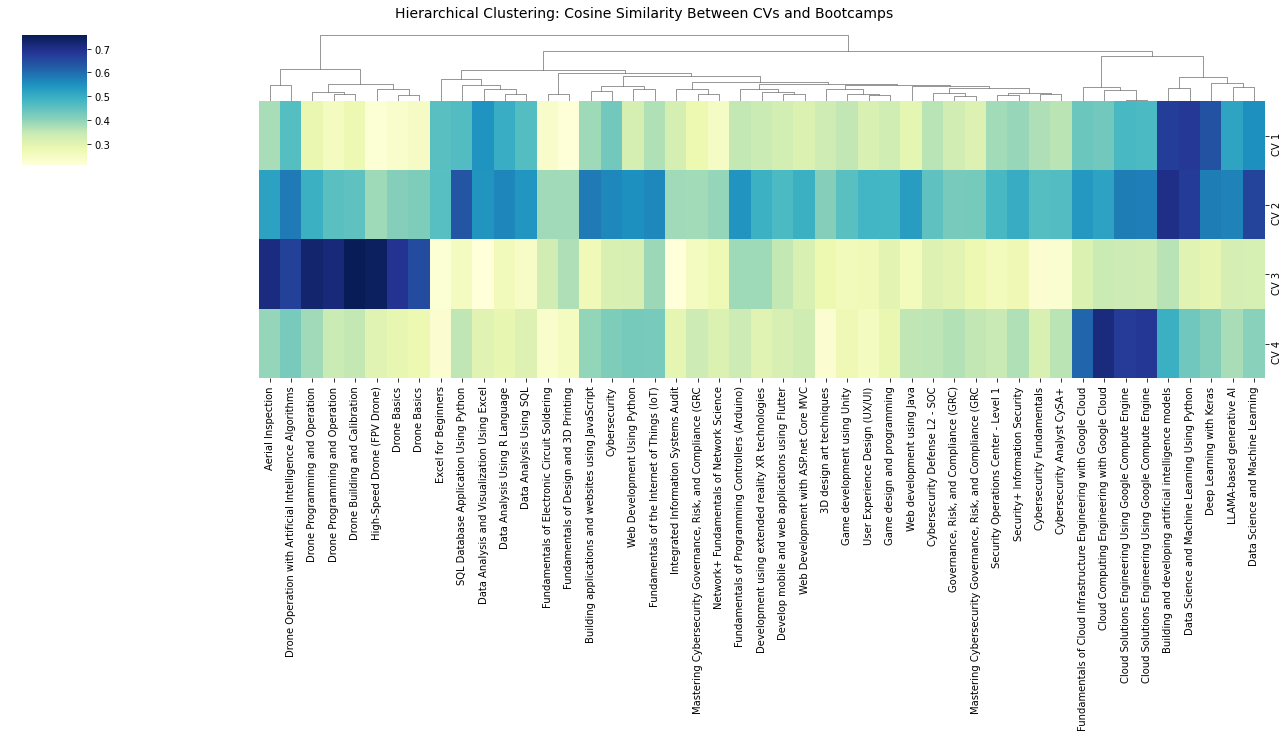

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Stack all CV embeddings into one array 
all_cv_embeddings = np.vstack([cv_embedding1, cv_embedding2, cv_embedding3, cv_embedding4])  

# Compute cosine similarity matrix 
similarity_matrix = cosine_similarity(all_cv_embeddings, bootcamp_embeddings)


cv_labels = [f"CV {i+1}" for i in range(similarity_matrix.shape[0])]
bootcamp_labels = df['Title'].tolist()

# Plot hierarchical clustering heatmap
sns.clustermap(
    similarity_matrix,
    figsize=(18, 10),
    cmap="YlGnBu",
    xticklabels=bootcamp_labels,
    yticklabels=cv_labels,
    col_cluster=True,  
    row_cluster=False,  
    annot=False,
    metric='euclidean'
)

plt.suptitle("Hierarchical Clustering: Cosine Similarity Between CVs and Bootcamps", fontsize=14, y=1.02)
plt.show()